# Imports

In [100]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from fastf1.core import Laps
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [101]:
year = 2022
gp_round = 2
ses = 'FP3'

In [102]:
driver_1 = 'VER'
driver_2 = 'PER'

In [103]:
events_list = ff1.get_event_schedule(2022)[2:]
events_list_2021 = ff1.get_event_schedule(2021)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev

In [104]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=False, telemetry=True, messages=False)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 3 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']


In [105]:
session.laps.pick_quicklaps()['Driver'].unique()

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'HUL', 'ZHO', 'ALB', 'TSU',
       'MAG', 'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [106]:
drivers = session.laps['Driver'].unique()
drivers

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'HUL', 'ZHO', 'ALB', 'TSU',
       'MAG', 'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [107]:
session.laps.pick_quicklaps()['Driver'].unique()

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'HUL', 'ZHO', 'ALB', 'TSU',
       'MAG', 'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [108]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True,ESP
8,7,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True,MCO
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True,AZE
10,9,Canada,Montréal,FORMULA 1 AWS GRAND PRIX DU CANADA 2022,2022-06-19 16:00:00,Canadian Grand Prix,conventional,Practice 1,2022-06-17 14:00:00,Practice 2,2022-06-17 17:00:00,Practice 3,2022-06-18 13:00:00,Qualifying,2022-06-18 16:00:00,Race,2022-06-19 14:00:00,True,CAN
11,10,Great Britain,Silverstone,FORMULA 1 LENOVO BRITISH GRAND PRIX 2022,2022-07-03 17:00:00,British Grand Prix,conventional,Practice 1,2022-07-01 13:00:00,Practice 2,2022-07-01 16:00:00,Practice 3,2022-07-02 12:00:00,Qualifying,2022-07-02 15:00:00,Race,2022-07-03 15:00:00,True,GBR


In [109]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [110]:
results = session.results
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
27,27,N HULKENBERG,HUL,Aston Martin,2d826d,Nico,Hulkenberg,Nico Hulkenberg,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [111]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-26 14:59:04.618,0 days 01:14:04.609000,,NaN,0 days 00:00:00,10665,292,7,100,False,12,interpolation,0.150191,0.000025,OnTrack,-1295,227,117
3,2022-03-26 14:59:04.733,0 days 01:14:04.724000,,NaN,0 days 00:00:00.115000,10336,293,8,100,False,12,car,9.540278,0.001561,OnTrack,-1327,316,117
4,2022-03-26 14:59:04.783,0 days 01:14:04.774000,,NaN,0 days 00:00:00.165000,10390,294,8,100,False,12,pos,13.629646,0.002230,OnTrack,-1341,355,118
5,2022-03-26 14:59:04.933,0 days 01:14:04.924000,,NaN,0 days 00:00:00.315000,10444,295,8,100,False,12,car,25.929167,0.004243,OnTrack,-1383,468,118
6,2022-03-26 14:59:05.063,0 days 01:14:05.054000,,NaN,0 days 00:00:00.445000,10488,296,8,100,False,12,pos,36.642578,0.005996,OnTrack,-1421,569,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2022-03-26 15:00:33.693,0 days 01:15:33.684000,,NaN,0 days 00:01:29.075000,10427,293,8,100,False,12,car,6045.231111,0.989288,OnTrack,-1124,-270,117
683,2022-03-26 15:00:33.942,0 days 01:15:33.933000,,NaN,0 days 00:01:29.324000,10486,293,8,100,False,12,pos,6065.558047,0.992615,OnTrack,-1206,-27,118
684,2022-03-26 15:00:34.053,0 days 01:15:34.044000,,NaN,0 days 00:01:29.435000,10545,294,8,100,False,12,car,6074.631111,0.994100,OnTrack,-1232,51,118
685,2022-03-26 15:00:34.262,0 days 01:15:34.253000,,NaN,0 days 00:01:29.644000,10544,294,8,100,False,12,pos,6091.739555,0.996899,OnTrack,-1275,172,118


In [112]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [113]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [114]:
fastest_driver_1

Time                      0 days 00:46:44.903000
DriverNumber                                   1
LapTime                   0 days 00:01:29.768000
LapNumber                                      5
Stint                                          1
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:33.022000
Sector2Time               0 days 00:00:28.672000
Sector3Time               0 days 00:00:28.074000
Sector1SessionTime        0 days 00:45:48.157000
Sector2SessionTime        0 days 00:46:16.829000
Sector3SessionTime        0 days 00:46:44.903000
SpeedI1                                    285.0
SpeedI2                                    326.0
SpeedFL                                    300.0
SpeedST                                    333.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     5.0
FreshTyre           

In [115]:
lap_1 = fastest_driver_1.telemetry

In [116]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [117]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [118]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [119]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [120]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
2,0 days 00:42:44.984000,1,0 days 00:01:30.453000,3,1,NaT,NaT,0 days 00:00:33.289000,0 days 00:00:28.682000,0 days 00:00:28.482000,0 days 00:41:47.820000,0 days 00:42:16.502000,0 days 00:42:44.984000,283.0,326.0,297.0,334.0,False,SOFT,3.0,True,0 days 00:41:14.531000,Red Bull Racing,VER,1,True,2022-03-26 14:26:14.540
4,0 days 00:46:44.903000,1,0 days 00:01:29.768000,5,1,NaT,NaT,0 days 00:00:33.022000,0 days 00:00:28.672000,0 days 00:00:28.074000,0 days 00:45:48.157000,0 days 00:46:16.829000,0 days 00:46:44.903000,285.0,326.0,300.0,333.0,True,SOFT,5.0,True,0 days 00:45:15.135000,Red Bull Racing,VER,1,True,2022-03-26 14:30:15.144
14,0 days 00:25:51.647000,55,0 days 00:01:31.011000,3,1,NaT,NaT,0 days 00:00:33.126000,0 days 00:00:29.205000,0 days 00:00:28.680000,0 days 00:24:53.762000,0 days 00:25:22.967000,0 days 00:25:51.647000,279.0,320.0,287.0,325.0,False,SOFT,3.0,True,0 days 00:24:20.636000,Ferrari,SAI,1,True,2022-03-26 14:09:20.645
16,0 days 00:29:56.993000,55,0 days 00:01:30.671000,5,1,NaT,NaT,0 days 00:00:33.143000,0 days 00:00:29.138000,0 days 00:00:28.390000,0 days 00:28:59.465000,0 days 00:29:28.603000,0 days 00:29:56.993000,281.0,319.0,290.0,325.0,False,SOFT,5.0,True,0 days 00:28:26.322000,Ferrari,SAI,1,True,2022-03-26 14:13:26.331
18,0 days 00:33:49.485000,55,0 days 00:01:30.323000,7,1,NaT,NaT,0 days 00:00:33.037000,0 days 00:00:28.913000,0 days 00:00:28.373000,0 days 00:32:52.199000,0 days 00:33:21.112000,0 days 00:33:49.485000,280.0,322.0,292.0,327.0,False,SOFT,7.0,True,0 days 00:32:19.162000,Ferrari,SAI,1,True,2022-03-26 14:17:19.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0 days 00:53:13.399000,77,0 days 00:01:30.710000,10,4,NaT,NaT,0 days 00:00:33.099000,0 days 00:00:28.988000,0 days 00:00:28.623000,0 days 00:52:15.788000,0 days 00:52:44.776000,0 days 00:53:13.399000,279.0,322.0,291.0,325.0,False,SOFT,3.0,True,0 days 00:51:42.689000,Alfa Romeo,BOT,2,True,2022-03-26 14:36:42.698
331,0 days 00:56:45.821000,77,0 days 00:01:30.030000,12,4,NaT,NaT,0 days 00:00:32.920000,0 days 00:00:28.811000,0 days 00:00:28.299000,0 days 00:55:48.711000,0 days 00:56:17.522000,0 days 00:56:45.821000,283.0,327.0,296.0,329.0,True,SOFT,5.0,True,0 days 00:55:15.791000,Alfa Romeo,BOT,1,True,2022-03-26 14:40:15.800
333,0 days 01:00:31.074000,77,0 days 00:01:30.158000,14,4,NaT,NaT,0 days 00:00:32.951000,0 days 00:00:28.900000,0 days 00:00:28.307000,0 days 00:59:33.867000,0 days 01:00:02.767000,0 days 01:00:31.074000,282.0,324.0,296.0,328.0,False,SOFT,7.0,True,0 days 00:59:00.916000,Alfa Romeo,BOT,1,True,2022-03-26 14:44:00.925
337,0 days 01:13:48.102000,77,0 days 00:01:34.927000,18,6,NaT,NaT,0 days 00:00:35.084000,0 days 00:00:30.214000,0 days 00:00:29.629000,0 days 01:12:48.259000,0 days 01:13:18.473000,0 days 01:13:48.102000,275.0,302.0,279.0,306.0,False,SOFT,11.0,False,0 days 01:12:13.175000,Alfa Romeo,BOT,1,True,2022-03-26 14:57:13.184


In [121]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

In [122]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^'],
                   8: [700, 350, '>'],
}

for i in range(1,23):
    if i in start_line_dict:
        continue
    else:
        start_line_dict[i] = [0, 0, '<']

In [123]:
def get_start_line_data():
    '''
    Returns a dict with the start line postitions
    '''
    start_line_dict_temp = requests.get('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/start_line_dict.json').json()
    return {int(k): v for k, v in start_line_dict_temp.items()} 

In [124]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
pix = 1/plt.rcParams['figure.dpi']

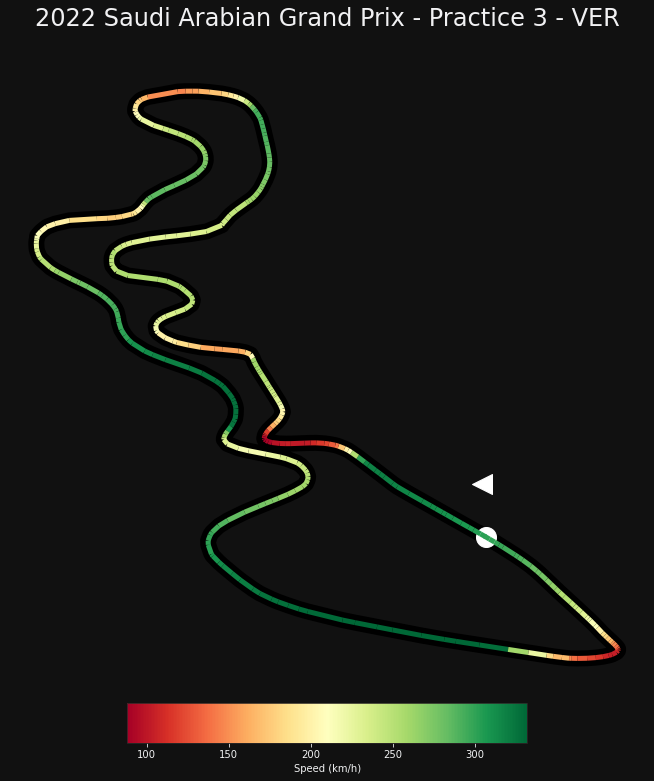

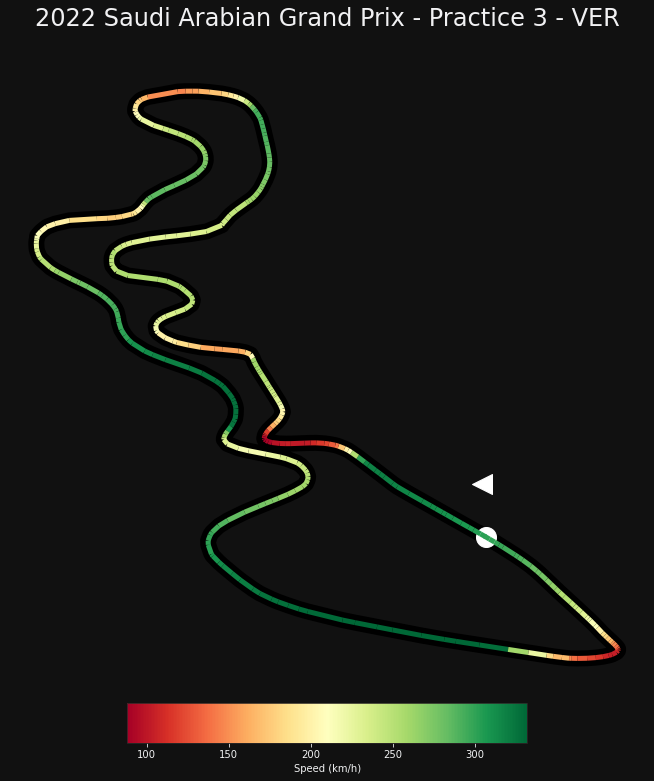

In [125]:
def plot_track_speed():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['Speed'])

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_speed()

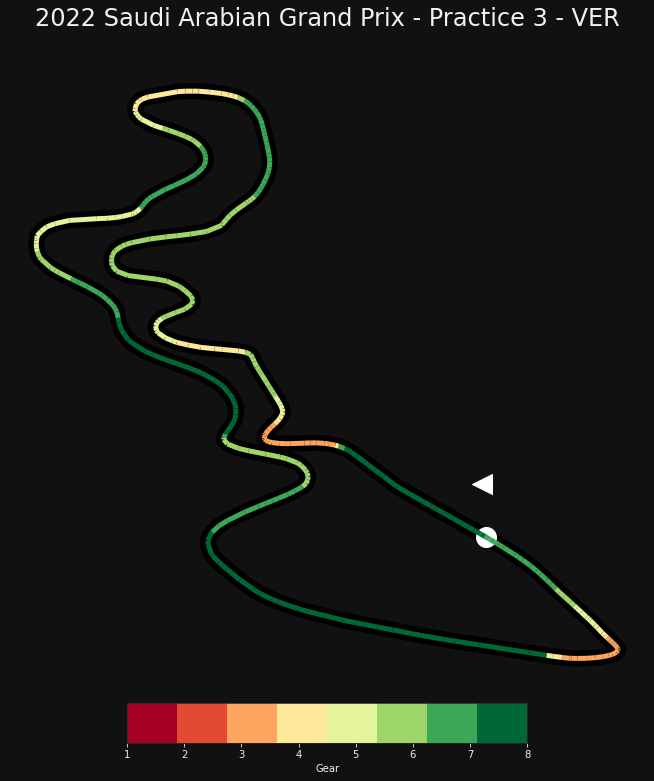

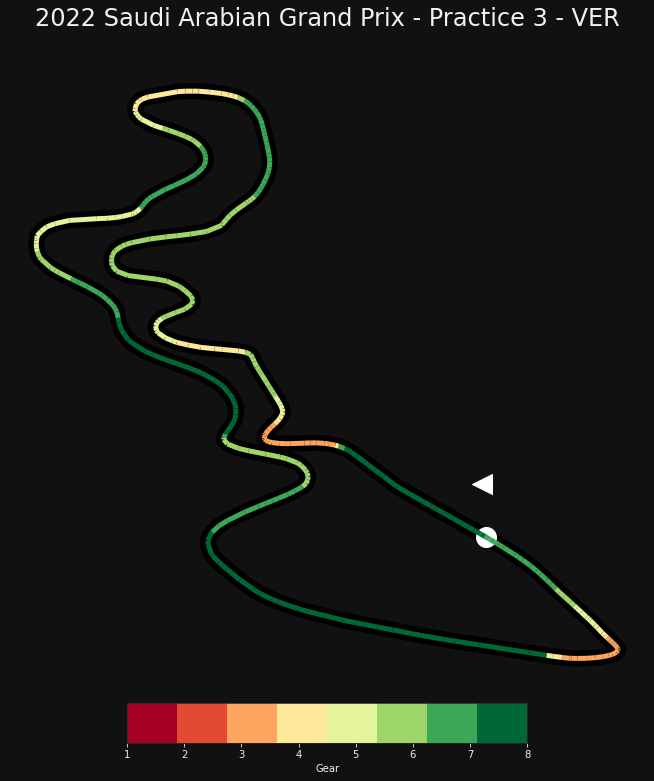

In [126]:
def plot_track_gear():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a norm to map from data points to colors
    norm = plt.Normalize(1, colormap_gear.N+1)
    lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['nGear'].to_numpy().astype(float))

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_gear()

In [127]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

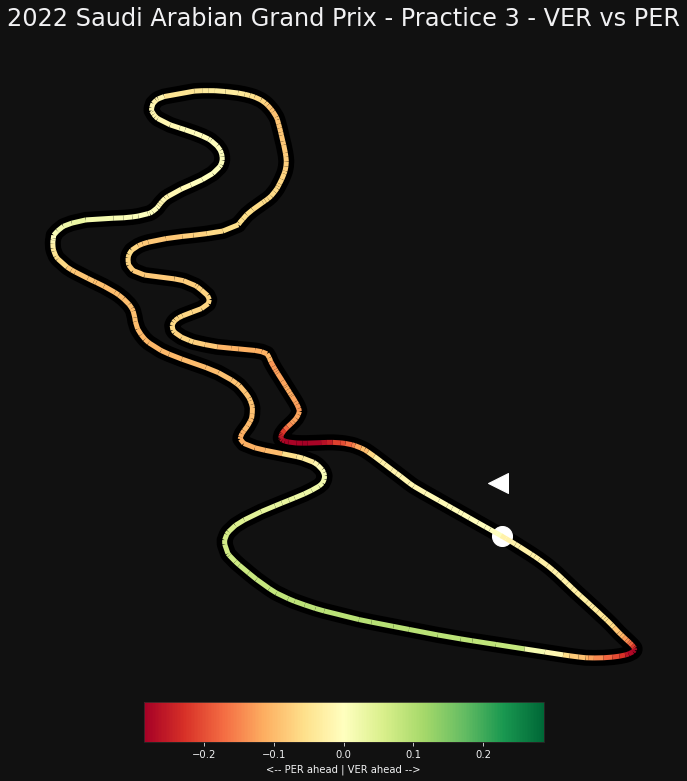

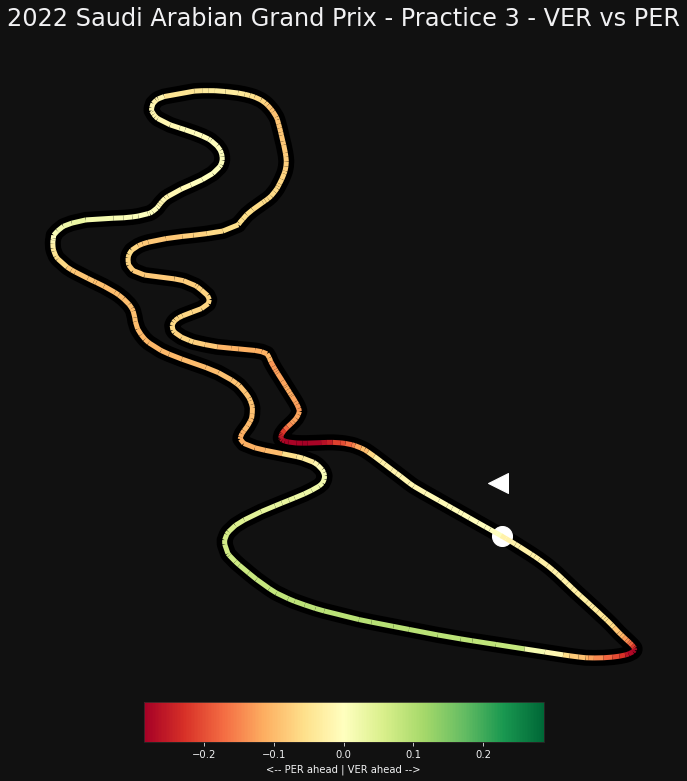

In [128]:
def plot_track_delta():

    # Determine boundaries for the colorbar
    vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(vmin, vmax)
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(delta_time)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_delta()

In [129]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [130]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [131]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [132]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [133]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
HAM,15,16,28,28,36,46,50,62
NOR,0,6,16,35,35,39,48,50
BOT,8,8,12,24,30,38,40,40
OCO,6,14,20,20,24,30,30,31
GAS,0,4,6,6,6,6,6,16


In [134]:
def get_round_mapping():
    '''
    Returns a round to event name mapping dictionary
    '''
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
    return round_mapping

In [135]:
df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

def plot_compare_points():
    
    round_mapping = get_round_mapping() 
    df_drivers = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line

    driver_1_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_1].values[0][4]
    driver_2_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_2].values[0][4]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [136]:
plot_compare_points()

In [137]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7,8
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [138]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
HAM,15,16,28,28,36,46,50,62
NOR,0,6,16,35,35,39,48,50
BOT,8,8,12,24,30,38,40,40
OCO,6,14,20,20,24,30,30,31
GAS,0,4,6,6,6,6,6,16


In [139]:
def get_drivers_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [140]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [141]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [142]:
def format_results_race(session_type):
    '''
    Returns a formatted session results dataframe
    '''    
    results = session.results    
    if session_type == 'Race' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['FullName','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        return results_formatted
        
    elif session_type == 'Qualifying':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3        
        results_formatted = results_formatted[['FullName','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        results_formatted['Position'] = results_formatted['Position'].astype(int)
        return results_formatted
    

In [143]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
27,27,N HULKENBERG,HUL,Aston Martin,2d826d,Nico,Hulkenberg,Nico Hulkenberg,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [144]:
def add_driver_info(session):
    drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)
    drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    missing_drivers = [x for x in drivers_standings.index.tolist() if x not in drivers_info['Abbreviation'].tolist()]
    if len(missing_drivers) > 0:
        df = session.results.copy().drop(columns=["Position", "GridPosition", "Q1", "Q2", "Q3", "Time", "Status", "Points"])
        for i in missing_drivers:
            df_missing = df[df['Abbreviation'] == i]
            df_full = pd.concat([drivers_info, df_missing])
        df_full.to_csv('../data/drivers_info.csv')
        
add_driver_info(session)

In [145]:




# def champ_pos(drv):

#Récupération des noms et des couleurs à partir d'une course

drv = pd.read_csv('../data/drivers_standings.csv', index_col=0)
drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)


# #Jointure entre les deux dataframe

df_class = drivers_info.merge(drv, how='right', left_on = ['Abbreviation'], right_index = True).reset_index()
df_class

#Modifie le dataframe pour avoir les courses en lignes

nb = len(drv.transpose())+1
df_final = pd.DataFrame(columns=['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName','Points', 'Race'])
for i in range(1,nb):
    df_class_ligne = df_class.loc[:,['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName',str(i)]]
    df_class_ligne['Race'] = i
    df_class_ligne.rename(columns={str(i): 'Points'}, inplace = True)
    df_final = pd.concat([df_final, df_class_ligne])
    
df_final.reset_index(drop = True, inplace = True)


#Ajoute une colonne classement avec la position au championnat à l'issue de chaque course

df_final = df_final.sort_values(by=['Race', 'Points'], ascending = [True, False])
df_final['classement']=len(drv)
longueur = len(df_final)
df_final.iloc[0,10] = 1

for i in range(1,longueur -1):
    if df_final.iloc[i,9] == df_final.iloc[i-1,9]:
        df_final.iloc[i,10] = df_final.iloc[i-1,10] +  1
    else :
        df_final.iloc[i,10] = 1
        
        
# #Génère une course 0 avec le classement cumulé de la dernière (permet de mettre les pilotes dans l'ordre du dernier classement)

df_init = df_final[df_final['Race']==nb-1].copy()
df_init['Race'] = 0
df_init['Points'] = 0

df_final = pd.concat([df_final, df_init])
        
# Paramétrage du dictionnaire des couleurs

colorMap ={}
df_class = pd.DataFrame(df_class)

for i in df_class.itertuples() :
    colorMap[i.Abbreviation] = '#' + i.TeamColor
        
        
#Création du graphique


#def champ_pos(df_final):

df_final = df_final.sort_values(by=['Race', 'classement'], ascending = [True, True])

maxY = df_final['Points'].max() + 20

fig = px.bar(df_final, x="Abbreviation", y="Points",  color = "Abbreviation", color_discrete_map = colorMap, animation_frame="Race", 
            labels=dict(Abbreviation="Name", classement="Ranking", FullName = "Pilot"), width = 1000, height=800, text = df_final['classement'])


fig.update_layout(title_text='Evolution of points in the championship', title_x=0.5, transition = {'duration': 1000}, showlegend = False)

fig.update_traces(textposition='inside', hovertemplate='Points: %{y}' )

fig.update_yaxes(range=[0, maxY])

fig.show()

In [146]:
def fastest_lap_comparison(fastest_laps):
    # Pass session.laps.pick_fastest() as argument when calling the function
    '''
    Plots the comparison of the best lap times of the selected session
    '''
    drivers = session.laps.pick_quicklaps()['Driver'].unique()

    list_fastest_laps = []
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_quicklaps().pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

    fastest_laps_final = fastest_laps.dropna(subset=['Time']).copy()

    teamcol = {}
    df_results = pd.DataFrame(session.results)

    for i in df_results.itertuples():
        if i.Abbreviation in fastest_laps_final['Driver'].unique():        
            teamcol[i.Abbreviation] = '#' + i.TeamColor    

    timestr = format_time(fastest_laps_final['LapTimeDelta'],13)
    timelap = format_time(fastest_laps_final['LapTime'],11)

    fastest_laps_final['Delta'] = timestr
    fastest_laps_final['BestLapstr'] = timelap
    fastest_laps_final['Delta'] = fastest_laps_final['Delta'].apply(lambda x: x + ' sec')
    fastest_laps_final['BestLapstr'] = fastest_laps_final['BestLapstr'].apply(lambda x: x + ' sec')

    plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - Fastest Lap : {fastest_laps_final['BestLapstr'].iloc[0]} - {fastest_laps_final['Driver'].iloc[0]}"

    fig = px.bar(fastest_laps_final, 
                x="LapTimeDelta", 
                y="Driver", 
                color='Driver',
                color_discrete_map=teamcol ,
                orientation='h',
                width=1000, height=600,
                template='plotly_dark',
                hover_data={'Delta':True,'LapTimeDelta':False})

    fig.update_layout(showlegend=False, title_text=plot_title)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(categoryorder='total descending')

    return fig

In [147]:
fastest_lap_comparison(session.laps.pick_fastest())

In [148]:
df_test = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/full_data-round_1.csv', index_col=0)
df_test

,Lap,Tyre,LapTimeSeconds,DeltaDeg,FuelDeg,AdjustedTime,FinalLapTime,TimeStr
0,1,SOFT,97.524302,0.090319,0.067867,97.614621,97.546754,01:37.546
1,2,SOFT,97.524302,0.102061,0.135734,97.626363,97.490629,01:37.490
2,3,SOFT,97.524302,0.115329,0.203601,97.639631,97.436030,01:37.436
3,4,SOFT,97.524302,0.130321,0.271468,97.654623,97.383155,01:37.383
4,5,SOFT,97.524302,0.147263,0.339335,97.671565,97.332230,01:37.332
...,...,...,...,...,...,...,...,...
52,53,HARD,99.427378,0.417607,3.596953,99.844985,96.248032,01:36.248
53,54,HARD,99.427378,0.444752,3.664820,99.872130,96.207310,01:36.207
54,55,HARD,99.427378,0.473661,3.732687,99.901038,96.168351,01:36.168
55,56,HARD,99.427378,0.504448,3.800554,99.931826,96.131272,01:36.131


In [157]:
events_list = pd.DataFrame(ff1.get_event_schedule(2022)[2:])
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3'],
                'sprint': ['Practice 1', 'Practice 2', 'Sprint']}


cols = ['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate']

for i in events_list.itertuples():
       
        gp_round = i.RoundNumber
        dffp = pd.DataFrame(columns=cols)
       
    #    try:              
        if i.EventFormat == 'conventional':
                sessions_list = session_dict['conventional']
        else:
                sessions_list = session_dict['sprint']   
        
        for j in sessions_list:        
                session = ff1.get_session(2022, gp_round, j)
                session.load(weather=False, telemetry=True, messages=False)
                df = pd.DataFrame(session.laps.pick_quicklaps())
                df['Session'] = j                
                dffp_complete = pd.concat([dffp, df])
        
        csv_name = f'full_data-round_{gp_round}.csv'
        dffp_complete.to_csv('/home/guillaume/Python_Projects/Jedha_F1_Project/data/' + csv_name)
        print(f'{csv_name} written')
             
    #    except:
    #           break

core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']
core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
a

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
2,0 days 00:38:10.135000,1,0 days 00:01:33.035000,3.0,1.0,NaT,NaT,0 days 00:00:29.658000,0 days 00:00:40.078000,0 days 00:00:23.299000,0 days 00:37:06.758000,0 days 00:37:46.836000,0 days 00:38:10.135000,235.0,270.0,287.0,319.0,False,SOFT,3.0,True,0 days 00:36:37.100000,Red Bull Racing,VER,1,True,2022-03-19 12:21:56.721000,Practice 3
8,0 days 01:03:01.382000,1,0 days 00:01:32.544000,9.0,3.0,NaT,NaT,0 days 00:00:29.716000,0 days 00:00:39.572000,0 days 00:00:23.256000,0 days 01:01:58.554000,0 days 01:02:38.126000,0 days 01:03:01.382000,236.0,271.0,287.0,319.0,True,SOFT,NaN,True,0 days 01:01:28.838000,Red Bull Racing,VER,1,True,2022-03-19 12:46:48.459000,Practice 3
11,0 days 01:12:29.473000,1,0 days 00:01:36.584000,12.0,4.0,NaT,NaT,0 days 00:00:31.054000,0 days 00:00:41.654000,0 days 00:00:23.876000,0 days 01:11:23.943000,0 days 01:12:05.597000,0 days 01:12:29.473000,231.0,258.0,273.0,289.0,False,SOFT,8.0,False,0 days 01:10:52.889000,Red Bull Racing,VER,1,True,2022-03-19 12:56:12.510000,Practice 3
12,0 days 01:14:06.143000,1,0 days 00:01:36.670000,13.0,4.0,NaT,NaT,0 days 00:00:31.005000,0 days 00:00:41.683000,0 days 00:00:23.982000,0 days 01:13:00.478000,0 days 01:13:42.161000,0 days 01:14:06.143000,232.0,259.0,274.0,293.0,False,SOFT,9.0,False,0 days 01:12:29.473000,Red Bull Racing,VER,1,True,2022-03-19 12:57:49.094000,Practice 3
13,0 days 01:15:42.791000,1,0 days 00:01:36.648000,14.0,4.0,NaT,NaT,0 days 00:00:31.018000,0 days 00:00:41.587000,0 days 00:00:24.043000,0 days 01:14:37.161000,0 days 01:15:18.748000,0 days 01:15:42.791000,231.0,259.0,275.0,295.0,False,SOFT,10.0,False,0 days 01:14:06.143000,Red Bull Racing,VER,1,True,2022-03-19 12:59:25.764000,Practice 3


core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_1.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']
core 

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
2,0 days 00:42:44.984000,1,0 days 00:01:30.453000,3,1,NaT,NaT,0 days 00:00:33.289000,0 days 00:00:28.682000,0 days 00:00:28.482000,0 days 00:41:47.820000,0 days 00:42:16.502000,0 days 00:42:44.984000,283.0,326.0,297.0,334.0,False,SOFT,3.0,True,0 days 00:41:14.531000,Red Bull Racing,VER,1,True,2022-03-26 14:26:14.540000,Practice 3
4,0 days 00:46:44.903000,1,0 days 00:01:29.768000,5,1,NaT,NaT,0 days 00:00:33.022000,0 days 00:00:28.672000,0 days 00:00:28.074000,0 days 00:45:48.157000,0 days 00:46:16.829000,0 days 00:46:44.903000,285.0,326.0,300.0,333.0,True,SOFT,5.0,True,0 days 00:45:15.135000,Red Bull Racing,VER,1,True,2022-03-26 14:30:15.144000,Practice 3
14,0 days 00:25:51.647000,55,0 days 00:01:31.011000,3,1,NaT,NaT,0 days 00:00:33.126000,0 days 00:00:29.205000,0 days 00:00:28.680000,0 days 00:24:53.762000,0 days 00:25:22.967000,0 days 00:25:51.647000,279.0,320.0,287.0,325.0,False,SOFT,3.0,True,0 days 00:24:20.636000,Ferrari,SAI,1,True,2022-03-26 14:09:20.645000,Practice 3
16,0 days 00:29:56.993000,55,0 days 00:01:30.671000,5,1,NaT,NaT,0 days 00:00:33.143000,0 days 00:00:29.138000,0 days 00:00:28.390000,0 days 00:28:59.465000,0 days 00:29:28.603000,0 days 00:29:56.993000,281.0,319.0,290.0,325.0,False,SOFT,5.0,True,0 days 00:28:26.322000,Ferrari,SAI,1,True,2022-03-26 14:13:26.331000,Practice 3
18,0 days 00:33:49.485000,55,0 days 00:01:30.323000,7,1,NaT,NaT,0 days 00:00:33.037000,0 days 00:00:28.913000,0 days 00:00:28.373000,0 days 00:32:52.199000,0 days 00:33:21.112000,0 days 00:33:49.485000,280.0,322.0,292.0,327.0,False,SOFT,7.0,True,0 days 00:32:19.162000,Ferrari,SAI,1,True,2022-03-26 14:17:19.171000,Practice 3


core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_2.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 5
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
1,0 days 00:26:10.825000,1,0 days 00:01:21.178000,2,1,NaT,NaT,0 days 00:00:27.994000,0 days 00:00:18.307000,0 days 00:00:34.877000,0 days 00:25:17.641000,0 days 00:25:35.948000,0 days 00:26:10.825000,278.0,301.0,295.0,220.0,False,MEDIUM,2.0,True,0 days 00:24:49.647000,Red Bull Racing,VER,1,True,2022-04-09 03:09:55.204000,Practice 3
7,0 days 00:52:13.632000,1,0 days 00:01:20.226000,8,3,NaT,NaT,0 days 00:00:27.615000,0 days 00:00:17.969000,0 days 00:00:34.642000,0 days 00:51:21.021000,0 days 00:51:38.990000,0 days 00:52:13.632000,280.0,304.0,300.0,251.0,False,MEDIUM,9.0,False,0 days 00:50:53.406000,Red Bull Racing,VER,1,True,2022-04-09 03:35:58.963000,Practice 3
9,0 days 00:55:33.288000,1,0 days 00:01:19.809000,10,3,NaT,NaT,0 days 00:00:27.467000,0 days 00:00:18.026000,0 days 00:00:34.316000,0 days 00:54:40.946000,0 days 00:54:58.972000,0 days 00:55:33.288000,280.0,302.0,299.0,268.0,True,MEDIUM,11.0,False,0 days 00:54:13.479000,Red Bull Racing,VER,1,True,2022-04-09 03:39:19.036000,Practice 3
18,0 days 00:32:32.802000,55,0 days 00:01:20.390000,3,1,NaT,NaT,0 days 00:00:27.664000,0 days 00:00:18.169000,0 days 00:00:34.557000,0 days 00:31:40.076000,0 days 00:31:58.245000,0 days 00:32:32.802000,278.0,301.0,291.0,206.0,False,SOFT,3.0,True,0 days 00:31:12.412000,Ferrari,SAI,1,True,2022-04-09 03:16:17.969000,Practice 3
22,0 days 00:49:05.754000,55,0 days 00:01:20.286000,7,3,NaT,NaT,0 days 00:00:27.443000,0 days 00:00:18.114000,0 days 00:00:34.729000,0 days 00:48:12.911000,0 days 00:48:31.025000,0 days 00:49:05.754000,281.0,298.0,297.0,203.0,False,SOFT,8.0,False,0 days 00:47:45.468000,Ferrari,SAI,1,True,2022-04-09 03:32:51.025000,Practice 3


core           INFO 	Loading data for Emilia Romagna Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_3.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 3
core        WARNING 	No lap data for driver 77
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31',

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
4,0 days 01:11:34.566000,1,0 days 00:01:19.960000,5.0,1.0,NaT,NaT,0 days 00:00:25.722000,0 days 00:00:27.654000,0 days 00:00:26.584000,0 days 01:10:40.328000,0 days 01:11:07.982000,0 days 01:11:34.566000,221.0,255.0,279.0,293.0,False,SOFT,5.0,True,0 days 01:10:14.606000,Red Bull Racing,VER,1,False,2022-04-23 14:41:14.619000,Sprint
5,0 days 01:12:53.962000,1,0 days 00:01:19.396000,6.0,1.0,NaT,NaT,0 days 00:00:25.474000,0 days 00:00:27.400000,0 days 00:00:26.522000,0 days 01:12:00.040000,0 days 01:12:27.440000,0 days 01:12:53.962000,222.0,255.0,279.0,295.0,False,SOFT,6.0,True,0 days 01:11:34.566000,Red Bull Racing,VER,1,True,2022-04-23 14:42:34.579000,Sprint
6,0 days 01:14:13.448000,1,0 days 00:01:19.486000,7.0,1.0,NaT,NaT,0 days 00:00:25.263000,0 days 00:00:27.526000,0 days 00:00:26.697000,0 days 01:13:19.225000,0 days 01:13:46.751000,0 days 01:14:13.448000,221.0,253.0,277.0,292.0,False,SOFT,7.0,True,0 days 01:12:53.962000,Red Bull Racing,VER,1,True,2022-04-23 14:43:53.975000,Sprint
7,0 days 01:15:32.823000,1,0 days 00:01:19.375000,8.0,1.0,NaT,NaT,0 days 00:00:25.332000,0 days 00:00:27.460000,0 days 00:00:26.583000,0 days 01:14:38.780000,0 days 01:15:06.240000,0 days 01:15:32.823000,NaN,254.0,279.0,294.0,False,SOFT,8.0,True,0 days 01:14:13.448000,Red Bull Racing,VER,1,True,2022-04-23 14:45:13.461000,Sprint
8,0 days 01:16:52.112000,1,0 days 00:01:19.289000,9.0,1.0,NaT,NaT,0 days 00:00:25.307000,0 days 00:00:27.431000,0 days 00:00:26.551000,0 days 01:15:58.130000,0 days 01:16:25.561000,0 days 01:16:52.112000,222.0,254.0,279.0,293.0,False,SOFT,9.0,True,0 days 01:15:32.823000,Red Bull Racing,VER,1,True,2022-04-23 14:46:32.836000,Sprint


core           INFO 	Loading data for Miami Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_4.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core           INFO 	Loading data for Miami Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 77
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', 

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
1,0 days 00:18:18.461000,1,0 days 00:01:34.037000,2,1,NaT,NaT,0 days 00:00:31.547000,0 days 00:00:35.663000,0 days 00:00:26.827000,0 days 00:17:15.971000,0 days 00:17:51.634000,0 days 00:18:18.461000,210.0,184.0,280.0,327.0,False,MEDIUM,NaN,True,0 days 00:16:44.424000,Red Bull Racing,VER,1,True,2022-05-07 17:01:44.480000,Practice 3
3,0 days 00:21:55.249000,1,0 days 00:01:32.447000,4,1,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:35.402000,0 days 00:00:26.114000,0 days 00:20:53.733000,0 days 00:21:29.135000,0 days 00:21:55.249000,217.0,189.0,284.0,329.0,False,MEDIUM,NaN,True,0 days 00:20:22.802000,Red Bull Racing,VER,1,True,2022-05-07 17:05:22.858000,Practice 3
5,0 days 00:25:30.820000,1,0 days 00:01:31.355000,6,1,NaT,NaT,0 days 00:00:30.449000,0 days 00:00:34.946000,0 days 00:00:25.960000,0 days 00:24:29.914000,0 days 00:25:04.860000,0 days 00:25:30.820000,220.0,191.0,285.0,332.0,False,MEDIUM,NaN,True,0 days 00:23:59.465000,Red Bull Racing,VER,1,True,2022-05-07 17:08:59.521000,Practice 3
8,0 days 00:45:29.333000,1,0 days 00:01:34.869000,9,2,NaT,NaT,0 days 00:00:31.808000,0 days 00:00:35.893000,0 days 00:00:27.168000,0 days 00:44:26.272000,0 days 00:45:02.165000,0 days 00:45:29.333000,210.0,180.0,273.0,301.0,False,MEDIUM,10.0,False,0 days 00:43:54.464000,Red Bull Racing,VER,1,True,2022-05-07 17:28:54.520000,Practice 3
9,0 days 00:47:05.171000,1,0 days 00:01:35.838000,10,2,NaT,NaT,0 days 00:00:32.002000,0 days 00:00:36.851000,0 days 00:00:26.985000,0 days 00:46:01.335000,0 days 00:46:38.186000,0 days 00:47:05.171000,208.0,181.0,272.0,305.0,False,MEDIUM,11.0,False,0 days 00:45:29.333000,Red Bull Racing,VER,1,True,2022-05-07 17:30:29.389000,Practice 3


core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_5.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '47', '45', '44', '36', '31', '22', '20', '18', '16', '14', '10', '6', '5', '4', '3', '77', '88']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core         

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
1,0 days 00:42:41.460000,1,0 days 00:01:20.475000,2,1,NaT,NaT,0 days 00:00:22.274000,0 days 00:00:30.317000,0 days 00:00:27.884000,0 days 00:41:43.259000,0 days 00:42:13.576000,0 days 00:42:41.460000,287.0,301.0,282.0,318.0,False,SOFT,2.0,True,0 days 00:41:20.985000,Red Bull Racing,VER,1,True,2022-05-21 11:26:21.002000,Practice 3
4,0 days 00:47:56.891000,1,0 days 00:01:20.640000,5,2,NaT,NaT,0 days 00:00:22.411000,0 days 00:00:30.318000,0 days 00:00:27.911000,0 days 00:46:58.662000,0 days 00:47:28.980000,0 days 00:47:56.891000,288.0,303.0,283.0,317.0,False,SOFT,6.0,None,0 days 00:46:36.251000,Red Bull Racing,VER,1,True,2022-05-21 11:31:36.268000,Practice 3
7,0 days 01:05:03.536000,1,0 days 00:01:19.844000,8,3,NaT,NaT,0 days 00:00:22.214000,0 days 00:00:29.989000,0 days 00:00:27.641000,0 days 01:04:05.906000,0 days 01:04:35.895000,0 days 01:05:03.536000,287.0,304.0,282.0,319.0,True,SOFT,3.0,True,0 days 01:03:43.692000,Red Bull Racing,VER,1,True,2022-05-21 11:48:43.709000,Practice 3
13,0 days 00:31:10.462000,55,0 days 00:01:20.484000,2,1,NaT,NaT,0 days 00:00:22.609000,0 days 00:00:30.128000,0 days 00:00:27.747000,0 days 00:30:12.587000,0 days 00:30:42.715000,0 days 00:31:10.462000,281.0,302.0,281.0,311.0,False,SOFT,2.0,True,0 days 00:29:49.978000,Ferrari,SAI,1,True,2022-05-21 11:14:49.995000,Practice 3
16,0 days 00:37:45.434000,55,0 days 00:01:20.649000,5,2,NaT,NaT,0 days 00:00:22.335000,0 days 00:00:30.302000,0 days 00:00:28.012000,0 days 00:36:47.120000,0 days 00:37:17.422000,0 days 00:37:45.434000,284.0,306.0,285.0,317.0,False,SOFT,6.0,False,0 days 00:36:24.785000,Ferrari,SAI,1,True,2022-05-21 11:21:24.802000,Practice 3


core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_6.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core          

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
1,0 days 00:29:06.968000,1,0 days 00:01:14.455000,2,1,NaT,NaT,0 days 00:00:19.821000,0 days 00:00:34.940000,0 days 00:00:19.694000,0 days 00:28:12.334000,0 days 00:28:47.274000,0 days 00:29:06.968000,209.0,195.0,264.0,277.0,False,SOFT,2.0,True,0 days 00:27:52.513000,Red Bull Racing,VER,1,True,2022-05-28 11:12:53.464000,Practice 3
3,0 days 00:32:00.927000,1,0 days 00:01:13.685000,4,1,NaT,NaT,0 days 00:00:19.643000,0 days 00:00:34.559000,0 days 00:00:19.483000,0 days 00:31:06.885000,0 days 00:31:41.444000,0 days 00:32:00.927000,213.0,199.0,265.0,279.0,False,SOFT,4.0,True,0 days 00:30:47.242000,Red Bull Racing,VER,1,True,2022-05-28 11:15:48.193000,Practice 3
5,0 days 00:35:03.859000,1,0 days 00:01:13.680000,6,1,NaT,NaT,0 days 00:00:19.391000,0 days 00:00:34.803000,0 days 00:00:19.486000,0 days 00:34:09.570000,0 days 00:34:44.373000,0 days 00:35:03.859000,216.0,199.0,266.0,279.0,False,SOFT,6.0,True,0 days 00:33:50.179000,Red Bull Racing,VER,1,True,2022-05-28 11:18:51.130000,Practice 3
7,0 days 00:38:08.311000,1,0 days 00:01:13.422000,8,1,NaT,NaT,0 days 00:00:19.427000,0 days 00:00:34.404000,0 days 00:00:19.591000,0 days 00:37:14.316000,0 days 00:37:48.720000,0 days 00:38:08.311000,209.0,201.0,269.0,282.0,False,SOFT,8.0,True,0 days 00:36:54.889000,Red Bull Racing,VER,1,True,2022-05-28 11:21:55.840000,Practice 3
11,0 days 00:44:26.518000,1,0 days 00:01:13.299000,12,1,NaT,NaT,0 days 00:00:19.327000,0 days 00:00:34.472000,0 days 00:00:19.500000,0 days 00:43:32.546000,0 days 00:44:07.018000,0 days 00:44:26.518000,213.0,199.0,265.0,279.0,False,SOFT,12.0,True,0 days 00:43:13.219000,Red Bull Racing,VER,1,True,2022-05-28 11:28:14.170000,Practice 3


core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data


full_data-round_7.csv written


api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']
core      

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
1,0 days 00:55:27.755000,1,0 days 00:01:44.468000,2,1,NaT,NaT,0 days 00:00:36.992000,0 days 00:00:42.338000,0 days 00:00:25.138000,0 days 00:54:20.279000,0 days 00:55:02.617000,0 days 00:55:27.755000,216.0,221.0,338.0,317.0,False,SOFT,2.0,True,0 days 00:53:43.287000,Red Bull Racing,VER,1,True,2022-06-11 11:39:20.544000,Practice 3
4,0 days 01:02:23.726000,1,0 days 00:01:43.653000,5,2,NaT,NaT,0 days 00:00:36.455000,0 days 00:00:41.890000,0 days 00:00:25.308000,0 days 01:01:16.528000,0 days 01:01:58.418000,0 days 01:02:23.726000,221.0,218.0,335.0,315.0,False,SOFT,6.0,False,0 days 01:00:40.073000,Red Bull Racing,VER,1,True,2022-06-11 11:46:17.330000,Practice 3
8,0 days 01:21:25.127000,1,0 days 00:01:43.449000,9,3,NaT,NaT,0 days 00:00:36.504000,0 days 00:00:41.821000,0 days 00:00:25.124000,0 days 01:20:18.182000,0 days 01:21:00.003000,0 days 01:21:25.127000,224.0,226.0,338.0,318.0,True,SOFT,4.0,True,0 days 01:19:41.678000,Red Bull Racing,VER,1,True,2022-06-11 12:05:18.935000,Practice 3
15,0 days 00:43:21.875000,55,0 days 00:01:46.457000,2,1,NaT,NaT,0 days 00:00:37.525000,0 days 00:00:43.474000,0 days 00:00:25.458000,0 days 00:42:12.943000,0 days 00:42:56.417000,0 days 00:43:21.875000,225.0,217.0,326.0,314.0,False,SOFT,2.0,True,0 days 00:41:35.418000,Ferrari,SAI,1,True,2022-06-11 11:27:12.675000,Practice 3
18,0 days 00:50:03.384000,55,0 days 00:01:44.744000,5,1,NaT,NaT,0 days 00:00:37.113000,0 days 00:00:42.421000,0 days 00:00:25.210000,0 days 00:48:55.753000,0 days 00:49:38.174000,0 days 00:50:03.384000,218.0,217.0,332.0,317.0,False,SOFT,5.0,True,0 days 00:48:18.640000,Ferrari,SAI,1,True,2022-06-11 11:33:55.897000,Practice 3


core           INFO 	Loading data for Canadian Grand Prix - Practice 1 [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...


full_data-round_8.csv written


SessionNotAvailableError: No data for this session! If this session only finished recently, please try again in a few minutes.

In [156]:
session = ff1.get_session(2022, gp_round, 'FP1')
session.load(weather=False, telemetry=True, messages=False)
df = session.laps.pick_quicklaps()
df = pd.DataFrame(df)
df['Session'] = j
df

core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
4,0 days 00:22:09.009000,1,0 days 00:01:16.582000,5,1,NaT,NaT,0 days 00:00:20.385000,0 days 00:00:35.750000,0 days 00:00:20.447000,0 days 00:21:12.812000,0 days 00:21:48.562000,0 days 00:22:09.009000,201.0,189.0,254.0,276.0,False,HARD,5.0,True,0 days 00:20:52.427000,Red Bull Racing,VER,1,True,2022-05-27 12:05:53.361,Practice 1
6,0 days 00:24:51.744000,1,0 days 00:01:16.276000,7,1,NaT,NaT,0 days 00:00:19.989000,0 days 00:00:35.947000,0 days 00:00:20.340000,0 days 00:23:55.457000,0 days 00:24:31.404000,0 days 00:24:51.744000,205.0,191.0,262.0,275.0,False,HARD,7.0,True,0 days 00:23:35.468000,Red Bull Racing,VER,1,True,2022-05-27 12:08:36.402,Practice 1
8,0 days 00:27:53.573000,1,0 days 00:01:15.933000,9,1,NaT,NaT,0 days 00:00:19.961000,0 days 00:00:35.489000,0 days 00:00:20.483000,0 days 00:26:57.601000,0 days 00:27:33.090000,0 days 00:27:53.573000,207.0,194.0,262.0,279.0,False,HARD,9.0,True,0 days 00:26:37.640000,Red Bull Racing,VER,1,True,2022-05-27 12:11:38.574,Practice 1
10,0 days 00:30:47.548000,1,0 days 00:01:15.327000,11,1,NaT,NaT,0 days 00:00:19.812000,0 days 00:00:35.364000,0 days 00:00:20.151000,0 days 00:29:52.033000,0 days 00:30:27.397000,0 days 00:30:47.548000,205.0,195.0,263.0,278.0,False,HARD,11.0,True,0 days 00:29:32.221000,Red Bull Racing,VER,2,True,2022-05-27 12:14:33.155,Practice 1
15,0 days 00:45:24.814000,1,0 days 00:01:16.005000,16,2,NaT,NaT,0 days 00:00:20.175000,0 days 00:00:35.477000,0 days 00:00:20.353000,0 days 00:44:28.984000,0 days 00:45:04.461000,0 days 00:45:24.814000,207.0,190.0,263.0,277.0,False,HARD,17.0,False,0 days 00:44:08.809000,Red Bull Racing,VER,1,True,2022-05-27 12:29:09.743,Practice 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0 days 00:53:50.105000,63,0 days 00:01:15.211000,21,3,NaT,NaT,0 days 00:00:19.746000,0 days 00:00:35.405000,0 days 00:00:20.060000,0 days 00:52:54.640000,0 days 00:53:30.045000,0 days 00:53:50.105000,208.0,200.0,266.0,275.0,True,MEDIUM,10.0,True,0 days 00:52:34.894000,Mercedes,RUS,1,True,2022-05-27 12:37:35.828,Practice 1
546,0 days 00:56:39.776000,63,0 days 00:01:15.797000,23,3,NaT,NaT,0 days 00:00:19.706000,0 days 00:00:35.714000,0 days 00:00:20.377000,0 days 00:55:43.685000,0 days 00:56:19.399000,0 days 00:56:39.776000,207.0,197.0,250.0,276.0,False,MEDIUM,12.0,True,0 days 00:55:23.979000,Mercedes,RUS,1,True,2022-05-27 12:40:24.913,Practice 1
550,0 days 01:08:59.150000,63,0 days 00:01:19.037000,27,4,NaT,NaT,0 days 00:00:21.441000,0 days 00:00:36.569000,0 days 00:00:21.027000,0 days 01:08:01.554000,0 days 01:08:38.123000,0 days 01:08:59.150000,195.0,190.0,251.0,271.0,False,HARD,15.0,False,0 days 01:07:40.113000,Mercedes,RUS,1,True,2022-05-27 12:52:41.047,Practice 1
551,0 days 01:10:16.904000,63,0 days 00:01:17.754000,28,4,NaT,NaT,0 days 00:00:20.650000,0 days 00:00:36.364000,0 days 00:00:20.740000,0 days 01:09:19.800000,0 days 01:09:56.164000,0 days 01:10:16.904000,199.0,193.0,252.0,272.0,False,HARD,16.0,False,0 days 01:08:59.150000,Mercedes,RUS,1,True,2022-05-27 12:54:00.084,Practice 1
